In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("employee_productivity_data.csv")
df.drop(["EmployeeID","Department"],axis=1,inplace=True)
df

,Age,Experience_Years,Monthly_Hours,Tasks_Completed,Performance_Score,Training_Hours,Satisfaction_Level
0,59,26,216,139,11,45,0.67
1,49,25,121,156,46,17,0.55
2,35,26,152,188,16,38,0.47
3,28,11,196,148,1,49,0.96
4,41,2,235,149,63,26,0.57
...,...,...,...,...,...,...,...
495,41,28,140,129,96,32,0.46
496,56,20,161,38,22,48,0.54
497,43,33,232,51,68,10,0.11
498,36,10,224,156,69,45,0.47


In [5]:
x = df
x

,Age,Experience_Years,Monthly_Hours,Tasks_Completed,Performance_Score,Training_Hours,Satisfaction_Level
0,59,26,216,139,11,45,0.67
1,49,25,121,156,46,17,0.55
2,35,26,152,188,16,38,0.47
3,28,11,196,148,1,49,0.96
4,41,2,235,149,63,26,0.57
...,...,...,...,...,...,...,...
495,41,28,140,129,96,32,0.46
496,56,20,161,38,22,48,0.54
497,43,33,232,51,68,10,0.11
498,36,10,224,156,69,45,0.47


In [6]:
scalar = StandardScaler()
scalar_data = scalar.fit_transform(x)
scalar_data

array([[ 1.57813933,  0.77413193,  0.82144253, ..., -1.40793671,
         1.37155696,  0.4280722 ],
       [ 0.69983383,  0.67165219, -1.63502436, ..., -0.13005214,
        -0.82645099, -0.04250918],
       [-0.52979388,  0.77413193, -0.83344043, ..., -1.22538177,
         0.82205497, -0.35623011],
       ...,
       [ 0.17285052,  1.49149009,  1.23516327, ...,  0.67318959,
        -1.37595297, -1.76797425],
       [-0.44196333, -0.86554386,  1.0283029 , ...,  0.70970058,
         1.37155696, -0.35623011],
       [ 1.57813933,  1.38901035, -1.24716117, ..., -0.45865103,
        -0.59095014,  0.46728731]], shape=(500, 7))

In [7]:
model = KMeans(n_clusters=3,random_state=22)
model.fit(scalar_data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,22
,copy_x,True
,algorithm,'lloyd'


In [8]:
label = model.labels_
label

array([1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1,
       2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1,
       1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 0,
       1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2,
       1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1,
       2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2,
       1, 0, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 0,

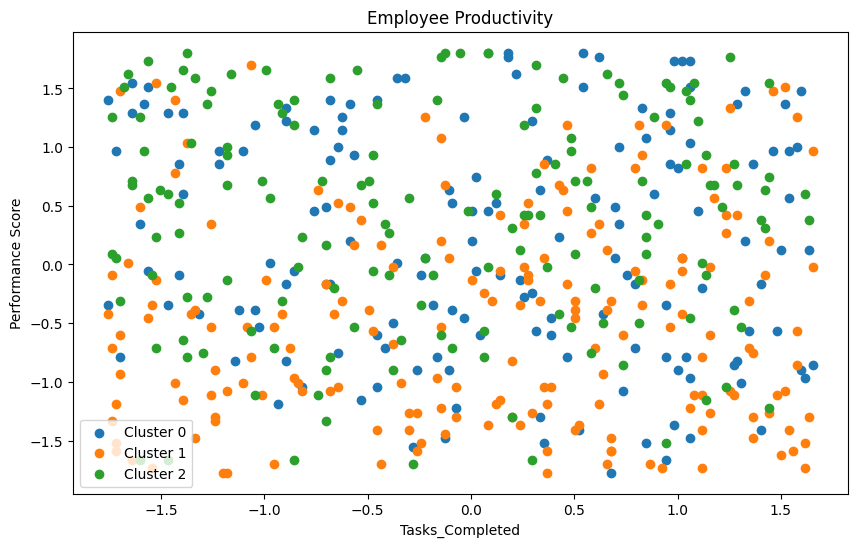

In [9]:
plt.figure(figsize=(10,6))
for i in np.unique(label):
    plt.scatter(scalar_data[label==i,3],scalar_data[label==i,4],label=f'Cluster {i}')
plt.legend()
plt.xlabel("Tasks_Completed")
plt.ylabel("Performance Score")
plt.title("Employee Productivity")
plt.show()